------------------------------------------------
# Cricket Format Clustering using Single Linkage Hierarchical Clustering Technique


## Project Number: CS4

## Submitted by:
#### Deepak Mewada (20CS91P02) - deepakmewada96@kgpian.iitkgp.ac.in


-------------------------------------------------

#**Objective:**


---


Consider the batting data of a batsman in a 
cricket match. His score has features like runs scored, ball faced,
dot balls faced, fours scored and sixes scored. You have to cluster these scores into formats of cricket
matches say Test cricket, One day cricket or Twenty-twenty. 


---




# Section 0 - Import Python Libraries

In [69]:
import numpy as np
import pandas as pd
import csv

#Only For testing silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#For measuring time taken by the code
import time
start = time.process_time()

In [70]:
#checking data

cricket_df = pd.read_csv("cricket_4_unlabelled.csv")
cricket_df

,Unnamed: 0,total_balls_faced,dot_balls_faced,number_of_fours,number_of_sixes,runs_scored
0,0,157,70,22,17,292
1,1,236,67,33,13,240
2,2,113,69,16,14,166
3,3,76,11,14,4,82
4,4,238,116,33,13,354
...,...,...,...,...,...,...
395,395,207,142,14,10,128
396,396,198,125,30,24,305
397,397,210,125,17,8,190
398,398,237,124,34,13,284


## 0.1 Data Preprocessing 


In [71]:
cricket_df = pd.read_csv("cricket_4_unlabelled.csv")
X = np.array(cricket_df).astype(np.float) #Converting the dataset into a numpy array of float type

X = np.delete(X,0,1)
print("Performing Normalisation of data.... ")

row = X.shape[0]
col = X.shape[1]

for m in range(0,col):
    mu = np.mean((X[:,m]))
    sigma = np.std((X[:,m]))
    for n in range(0,row):
        X[n,m] = (X[n,m] - mu)/sigma
print("Normalization Done !!!")        

Performing Normalisation of data.... 
Normalization Done !!!


# Task 1 : K-means Clustering
Write a program to perform k-means clustering on the given dataset. Consider k=3 clusters. . Randomly initialize k cluster means as k distinct data points. Iterate for 20 iterations. After the iterations are over, save the clustering information in a file. This file may be used in step 4 if the value of k is the optimal number of clusters. 

## 1.a K-mean algorihem

In [72]:
class K_mean_clustering:

    def euclidean_distance(A, B):
        d = np.linalg.norm(A-B)
        return d

    #This function assigns the centroids to the datasets based on the minimum euclidean distance
    def centroids_assignment(centroids, dataSet):
        assigned_centroid = []
        for i in dataSet:
            d = []
            for j in centroids:
                d.append(K_mean_clustering.euclidean_distance(i,j))
            assigned_centroid.append(np.argmin(d))
        return assigned_centroid
    
    #Based on the assignments, we define the new centroids by
    # taking the mean of all the data points that are assigned 
    #to one centroid in the last iteration.  
    def set_centroids(clusters, X):
        new_centroid = []
        new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],axis=1)
        for c in set(new_df['cluster']):
            current_centroid = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
            centroid_mean = current_centroid.mean(axis=0)
            new_centroid.append(centroid_mean)
        return new_centroid   


## 1.b Run K-Means 
To run K-Means, we first load the dataset and convert it into a numpy array for ease of operations.  
We then take k = 3, as asked in the question and randomly identify 3 rows as the initial centroids.  
After that, the functions <i>assign_centroids</i> and <i>update_centroids</i> are run iteratively 20 times to find the centroid for each dataset

In [89]:
cricket_df = pd.read_csv("cricket_4_unlabelled.csv")
print("loaded .CSV file : cricket_4_unlabelled.csv")
X = np.array(cricket_df) #Converting the dataset into a numpy array

K = 3
init_centroids = [0,3,41]

centroids = []
for i in init_centroids:
    centroids.append(X[i])
centroids = np.array(centroids)
print("K-means algo running for 20 iterations. . . ")
iters = 20
for i in range(iters):
    get_centroids = K_mean_clustering.centroids_assignment(centroids, X)
    centroids = K_mean_clustering.set_centroids(get_centroids, X)
print("K-means algo stopped. Cluster formed.")   

loaded .CSV file : cricket_4_unlabelled.csv
K-means algo running for 20 iterations. . . 
K-means algo stopped. Cluster formed.


## 1.c Write File 
We now write down the clusters in a new file called <i>cricket_1_labelled_K</i>, where K = number of clusters (here, K=3).  

In [74]:
cricket_df_cluster = cricket_df.copy() #initialise a new dataframe to store cluster information
cricket_df_cluster['cluster'] = get_centroids
cricket_df_cluster.to_csv("cricket_4_labelled_K_is_3.csv")
print("File saved : cricket_4_labelled_K_is_3.csv")

File saved : cricket_4_labelled_K_is_3.csv




---


# Task 2 - Evaluation of the clustering algorithm

Evaluate the result of your clustering algorithm using the Silhouette coefficient metric and print the
value of s.
The Silhouette Coefficient is defined for each sample and is composed of two scores:

**a:** The mean distance between a sample and all other points in the same cluster.

**b:** The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for
each sample. The score is bounded between -1 for incorrect clustering and +1 for highly dense
clustering. Scores around zero indicate overlapping clusters. Larger value of Silhouette Coefficient


---





## 2.a Function to calculate Silhouette Coefficient
Since we have to calculate the Silhouette Coefficient multiple times, we create a generic function to calculate Silhouette Coefficient. The function takes as inputs the dataframe along with cluster information and the value of the number of clusters (K).  

We calculate a as the mean distance between a sample and all other points in the same cluster.  
$$\mathcal{a} = \frac{1}{|C_{i}|-1} \sum \limits_{j \in C_{i}, \hspace{0.1cm} i \neq j} d(i,j)$$

We also calculate b as the mean distance between a sample and all other points in the next nearest cluster. Use of the minimum function is to check the next nearest cluster.
$$\mathcal{b} = \min\limits_{k \neq i} \frac{1}{|C_{k}|} \sum \limits_{j \in C_{k}} d(i,j)$$

We then calculate the silhouette score for each instance of the dataset as
$$\mathcal{s}_{i} = \frac{b_{i} - a_{i}}{max(a_{i},b_{i})} $$

Finally, <b>Silhouette Coefficient</b> of the entire dataset is taken as the mean of the Silhouette Scores of each instance

In [75]:
#defining Sillhout here
def silhoutte_metric(cricket_df_cluster,K):

    df_with_cluster = cricket_df_cluster.copy() 
    dataset_size = len(df_with_cluster.index) 
    np_df_with_cluster = df_with_cluster.to_numpy() 

    df_with_cluster["silhouette_value"]="" 

    for i in range(0, dataset_size): 
        this_instance = np_df_with_cluster[i,:-1] 
        this_centroid = np_df_with_cluster[i,-1] 

        a = None
        total_distance = 0
        c = 0

        for j in range(0, dataset_size):
            if this_centroid == np_df_with_cluster[j,-1]:
                d = np.linalg.norm(this_instance - np_df_with_cluster[j,:-1])
                total_distance += d
                c += 1
        
        #a is the mean distance to all other instances in this cluster 
        if (c>0):
            a = total_distance / c
            #print("a", i, "=", a)

        b = float("inf") #initialising b as maximum
        avg_dist = 0

        for centroid in range(0,K):
            total_distance = 0
            c = 0
            if centroid != this_centroid: #for all centroids except the one of this instance
                for k in range(0, dataset_size):
                    if np_df_with_cluster[k,-1] == centroid:
                        d = np.linalg.norm(this_instance - np_df_with_cluster[k,:-1])
                        total_distance += d
                        c += 1
                    #print("td", i, "=", total_distance)
                if c > 0:
                    avg_dist = total_distance / c
                if avg_dist < b:
                    b = avg_dist #updating with the minimum b to know the average distance from the next nearest cluster
        s = (b - a) / max(a,b)

        df_with_cluster.loc[i,"silhouette_value"] = s

    silhouette_value = df_with_cluster["silhouette_value"].mean()
    return silhouette_value

## 2.b Calculate Silhouette Coefficient for K = 3

We now run the function to find the Silhouette Coeffecient of the dataset with K = 3

In [76]:
s = silhoutte_metric(cricket_df_cluster, 3)
print("The Silhouette coefficient metric for K = 3 is", s)

#testing silhouette score using sklearn
km = KMeans(n_clusters=3, random_state=42)
km.fit_predict(X)
score = silhouette_score(X, km.labels_, metric='euclidean')
print("via library sklearn Silhouette coefficient metric for K = 3  is", score)

The Silhouette coefficient metric for K = 3 is 0.2975215057651689
via library sklearn Silhouette coefficient metric for K = 3  is 0.3087725312230132


This score indicates that there has been correct clustering. However, the clusters are not very dense, and there is a fair bit of overlapping.  
Using the silhouette_score function of sklearn.metrics, we find a similar score using the library too, and hence can verify that our clustering is corrector not.   



---


# Section 3 - Find optimal value of K
Repeat steps 1 and 2 for k = 4, 5 and 6 as well. Report the value of k for which you get the highest
value of the Silhouette Coefficient. This will be the optimal number of clusters. You will be using this
number in the next step.

---------------------
We now run the above steps for K = 4, 5 and 6

In [77]:
print("#############################################################################################")
print()
#fining optimal value of K
for K in range (3,7):
    init_centroids = np.random.choice(range(0, len(X)), K)
    centroids = []
    for i in init_centroids:
        centroids.append(X[i])
    centroids = np.array(centroids)
    
    iters = 20
    for i in range(iters):
        get_centroids = K_mean_clustering.centroids_assignment(centroids, X)
        centroids = K_mean_clustering.set_centroids(get_centroids, X)
    
    cricket_df_cluster = cricket_df.copy() #initialise a new dataframe to store cluster information
    cricket_df_cluster['cluster'] = get_centroids
    cricket_df_cluster.to_csv("cricket_4_labelled_K_is_"+ str(K) + ".csv") #Store the file for K = 4, 5 and 6
    print("File saved : cricket_4_labelled_K_is_"+ str(K) + ".csv !")

    s = silhoutte_metric(cricket_df_cluster, K)
    print("Silhouette coefficient metric for K =", K, "is", s)
    
    #testing silhouette score using sklearn
    km = KMeans(n_clusters=K, random_state=42)
    km.fit_predict(X)
    score = silhouette_score(X, km.labels_, metric='euclidean')
    print("via library sklearn Silhouette coefficient metric for K =", K, " is", score, "\n")
    print("-----------------------------------------------------------------------------------------")
    print()

print("#################################################################################################")

#############################################################################################

File saved : cricket_4_labelled_K_is_3.csv !
Silhouette coefficient metric for K = 3 is 0.3124821590171541
via library sklearn Silhouette coefficient metric for K = 3  is 0.3087725312230132 

-----------------------------------------------------------------------------------------

File saved : cricket_4_labelled_K_is_4.csv !
Silhouette coefficient metric for K = 4 is 0.30939421470920025
via library sklearn Silhouette coefficient metric for K = 4  is 0.302290513416582 

-----------------------------------------------------------------------------------------

File saved : cricket_4_labelled_K_is_5.csv !
Silhouette coefficient metric for K = 5 is 0.29381704722361957
via library sklearn Silhouette coefficient metric for K = 5  is 0.28633439589405785 

-----------------------------------------------------------------------------------------

File saved : cricket_4_labelled_K_is_6.csv !
Silhouett

In [78]:
K_optimal=3  #After analysing results in above cell
print("Since for K = ",K_optimal,"; Silhouette coefficient is highest hence optimal value of K is : ", K_optimal)  

Since for K =  3 ; Silhouette coefficient is highest hence optimal value of K is :  3


We observe that the best Silhouette Coefficient comes from k = 3. 
Thus here we are submitting a copy of the file <i>cricket_4_labelled_K_is_3.csv</i> as <b>kmeans.txt</b> in the overall ZIPPED submission.  
The file <b>kmeans.txt</b> is created as follows:

In [79]:
print("loaded .CSV file : cricket_4_labelled_K_is_3.csv")

cricket_df_cluster_final = pd.read_csv("cricket_4_labelled_K_is_3.csv")
cricket_df_cluster_final = cricket_df_cluster_final[['Unnamed: 0','cluster']]

l = len(cricket_df_cluster_final)

#initialize the cluster arrays
cluster={}
for c in range (K_optimal):
    cluster[c]=[]

for i in range(l):
    for j in range(K_optimal):
        if(cricket_df_cluster_final.at[i,'cluster']) == j:
            cluster[j].append(cricket_df_cluster_final.iat[i,0])

C=[]
for p in range (K_optimal):
    C.append(cluster[p])

df=pd.DataFrame(C)
df = df.sort_values(df.columns[0])
df = df.fillna('')
df.to_csv("kmeans.txt", header = False, sep = ",", index = False)       
print("kmeans.txt is saved !!!")

loaded .CSV file : cricket_4_labelled_K_is_3.csv
kmeans.txt is saved !!!




# Task 4 - Bottom-Up Hierarchical Clustering with single linkage strategy
Implement a bottom-up hierarchical clustering algorithm considering the same notion of similarity
as in step 1. Find k clusters (optimal number of clusters from step 3) using single linkage strategy.

##Bottom-Up Hierarchical Clustering is illustrated as follows : 

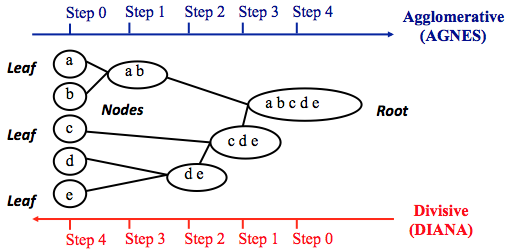


##Single linkage technique si explained in this figure
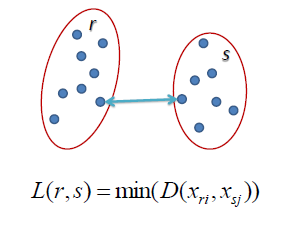


In [80]:
class agglomerative_SingleLinkageStartegy:

    def __init__(self, data, k):
        self.k = k
        self.data = data
        self.fit()

    def fit(self):
        n = len(self.data)
        self.clusters = {}

        for i in range(n):
          self.clusters[i] = []
          self.clusters[i].append(i)

        self.dist = np.sqrt((np.square(self.data[:,np.newaxis]-self.data).sum(axis=2)))

        for i in range(n-self.k):
            merge = self.merging()
            self.clusters[merge[0]] = self.clusters[merge[0]] + self.clusters[merge[1]]
            self.clusters.pop(merge[1])

        for i in range(self.k):
            while not i in self.clusters:
                for j in [x for x in list(map(int, self.clusters.keys())) if x >= i+1]:
                    self.clusters[j-1] = self.clusters.pop(j)

        for i in self.clusters.keys():
            self.clusters[i].sort()

    def merging(self):
        mini = 1e99 #taking big value
        merge = (None, None)

        for i in list(map(int, self.clusters.keys())):
            for j in [x for x in list(map(int, self.clusters.keys())) if x >= i+1]:
                if self.dist[i][j] < mini:
                    mini = self.dist[i][j]
                    merge = (i, j)
                    
        return merge

In [81]:
#Since our input matrix may have changed due to multiple operations, we re-initiate the input data in the numpy array X
cricket_df1 = pd.read_csv("cricket_4_unlabelled.csv")
X1 = np.array(cricket_df1).astype(np.float) #Converting the dataset into a numpy array of float type
X1 = np.delete(X1,0,1)
print("Performing Normalisation of data.... ")

row_count = X1.shape[0]
col_count = X1.shape[1]

for m in range(0,col_count):
    mu = np.mean((X1[:,m]))
    sigma = np.std((X1[:,m]))
    for n in range(0,row_count):
        X1[n,m] = (X1[n,m] - mu)/sigma
print("Normalisation Done!!!")

Performing Normalisation of data.... 
Normalisation Done!!!


In [82]:
#calling agglomerative
print("Bottom Up Agglomerative single linkage cluster formation !!!")
hac = agglomerative_SingleLinkageStartegy(X1,K_optimal)

Bottom Up Agglomerative single linkage cluster formation !!!


In [83]:
#Saving the Clusters

all_cluster_agglo=np.empty(len(X1), dtype=object)
for i in range(3):
   np.put(all_cluster_agglo,hac.clusters[i],i)

agglo_cluster={}
agglo_cluster[0] = hac.clusters[0]
agglo_cluster[1] = hac.clusters[1]
agglo_cluster[2] = hac.clusters[2]

all_cluster = [agglo_cluster[0], agglo_cluster[1], agglo_cluster[2]]
df=pd.DataFrame(all_cluster)
df = df.sort_values(df.columns[0])
df = df.fillna('')
df.to_csv("agglomerative.txt", header = False, sep = ",", index = False)
print("agglomerative.txt is saved !!!")

agglomerative.txt is saved !!!


#Task 4.b : Jaccard similarity between corresponding sets of both the cases
Now you have k clusters from the k-means algorithm and k clusters from hierarchical clustering on the
same dataset. Or in other words, the dataset is divided into k sets of data points as a result of the
k-means algorithm (case A). Similar is the case for the hierarchical clustering algorithm (case B). You
need to compute the Jaccard similarity between corresponding sets of both the cases.

##Jaccard similarity coefficient is calculated as follows



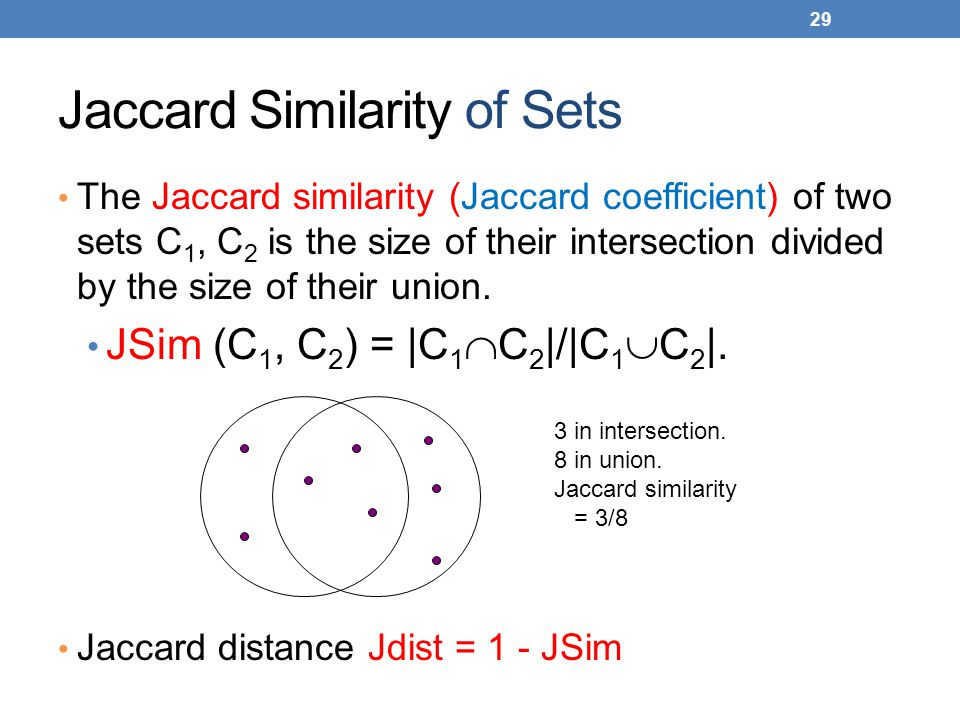


In [84]:
#defining Jaccard function
def jaccard(list1, list2):
    s1 = set(list1)
    s2 = set(list2)

    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [88]:
#calling Jacckard function
jc={}
for c in range (K_optimal):
    jc[c]=[]

print("Calculating Jaccard Similarity scores for all the mappings.....")
print("-------------------------------------------------------------------------")
print()
for i in range(K_optimal):
  for j in range(K_optimal):
    jc[i].append(jaccard(cluster[i],agglo_cluster[j]))
jc[i][j]*=10
print("Jaccard similarity score bet cluseter{0,1,2} of K-mean & cluster_agg{0,1,2} of Agglomerative are as follows...")
print()
print()

print(jc[0])
print(jc[1])
print(jc[2])


print()
print("-----------------------------------------------------------------------------")

Calculating Jaccard Similarity scores for all the mappings.....
-------------------------------------------------------------------------

Jaccard similarity score bet cluseter{0,1,2} of K-mean & cluster_agg{0,1,2} of Agglomerative are as follows...


[0.41904761904761906, 0.0, 0.013157894736842105]
[0.13577023498694518, 0.45384615384615384, 0.08396946564885496]
[0.3932926829268293, 0.03940886699507389, 0.4458598726114649]

-----------------------------------------------------------------------------


Here the Jaccard value shows the similarity between the clusters. It is dynamic;depends upon the formed clusters of K-mean & Agglomerative respectively. 
Higher the value in a row means both the corresponding cluster have high similarity.

In [86]:
print("Time taken for overall program single run is", time.process_time() - start, "seconds !!!")

Time taken for overall program single run is 63.66798628700002 seconds !!!



---

                Thank you for reading so far!!!
                  This is the end of file.
                     

---



